## Important
`run_mafft.sh` and `run_raxml.sh` in `Trees/H3N2_HA1_pre2010` to build the tree beforehand.

In [1]:
library(RColorBrewer)
library(ggplot2)
suppressPackageStartupMessages(library(ggtree))

CLUSTER_DIR <- "Clustering"
TREES_DIR <- "Trees"
PLOTS_DIR <- "Plots"

H3N2_HA1_PRE2010 <- "H3N2_HA1_pre2010"

In [2]:
dir.create(PLOTS_DIR, showWarnings = FALSE)

In [3]:
tree <- read.tree(file.path(TREES_DIR, H3N2_HA1_PRE2010, "RAxML_bestTree.PROTGAMMAGTR"))
clusterInfo <- read.csv(file.path(CLUSTER_DIR, paste0(H3N2_HA1_PRE2010, ".csv")), stringsAsFactors = FALSE)

In [4]:
group <- split(clusterInfo[["id"]], clusterInfo[["cluster"]])

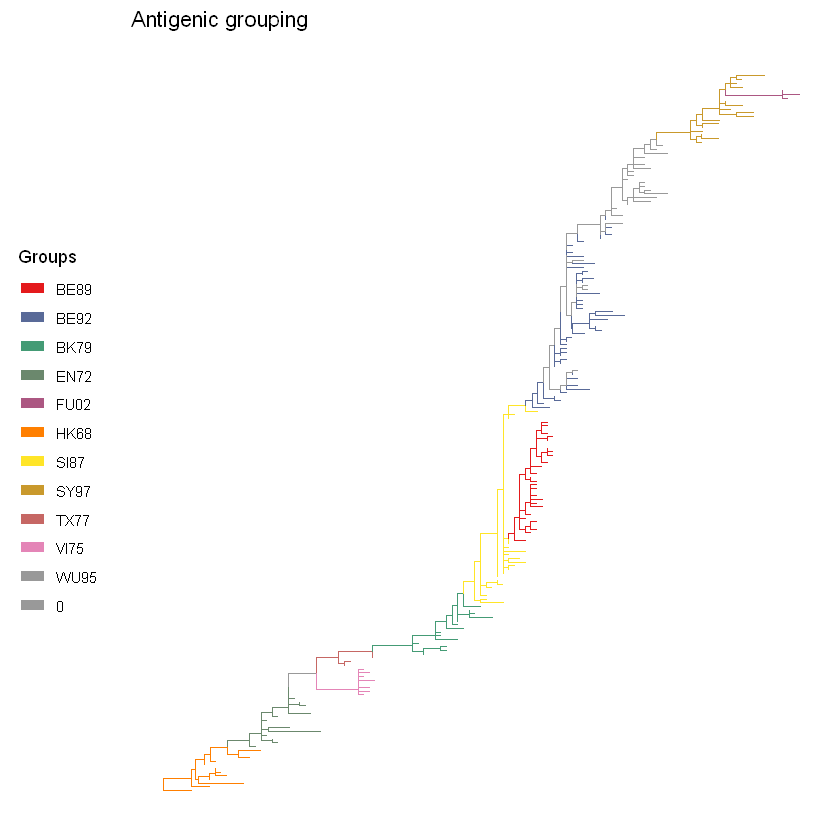

In [5]:
groupColors <- colorRampPalette(brewer.pal(9, "Set1"))(length(group))
names(groupColors) <- names(group)
groupColors["0"] <- "#999999"

p <- ggtree(groupOTU(tree, group), aes(color = group)) +
    theme(legend.position = "left") +
    ggtitle("Antigenic grouping") +
    scale_color_manual(values = as.list(groupColors), limits = names(groupColors)) +
    guides(
      color = guide_legend(
        override.aes = list(size = 3),
        title = 'Groups'
      )
    )
p
ggsave(
    filename = file.path(PLOTS_DIR, paste0(H3N2_HA1_PRE2010, "_cluster.pdf")), 
    plot = p, device = "pdf", width = 7, height = 10
)